# Golden section

Dados los parámetros iniciales: Intervalo $[a_1,b_1]$ y un valor de precisión mínima $\epsilon$. 

Primero considere $\tau=0.618$ y luego calcule:

<img src="http://drive.google.com/uc?export=view&id=1mpTWIPLuAfXBkqGqvFIW-U3ZbgNWmlH2">

Si $|b_{i+1}-a_{i+1}| \leq \epsilon$ entonces termine y reporte el intervalo $[x_1^{i+1},x_2^{i+1}]$. En otro caso asigne $i=i+1$ y vuelva al paso __2__.


In [15]:
# Golden section. Constant reduction of intervals
goldensecsearch <- function(g,a_1,b_1, epsilon, NMAX=20){
    tau <- 0.618
    x_1 <- b_1 - tau*(b_1-a_1)
    x_2 <- a_1 + tau*(b_1-a_1)
    i <- 1
    while(i <= NMAX){
        if(g(x_2) > g(x_1)){
            a_i <- a_1
            b_i <- x_2
            x_2 <- x_1
            x_1 <- b_i - tau*(b_i - a_i)
        }else{
            a_i <- x_1
            b_i <- b_1
            x_1 <- x_2
            x_2 <- a_i + tau*(b_i-a_i)
        }
        
        if(abs(b_i-a_i) <= epsilon){
            break
        }
        #print(i)
        i <- i + 1
    }
    return(c(x_1, x_2))
}

Encontrar ahora el valor de $x$ para el que la función $$g(x)=\exp^{-x} \cdot(-\cos{x})$$

alcanza su valor mínimo con $x\in[1.5, 2.5]$.

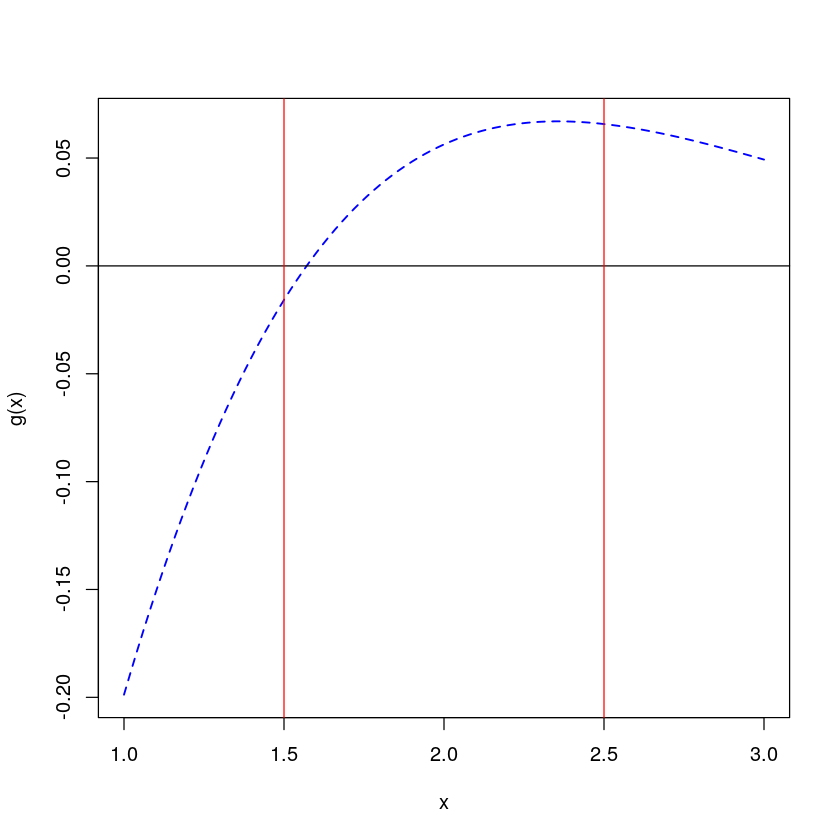

In [12]:
g <- function(x){
    return(exp(-x)*(-cos(x)))
}
curve(g, xlim=c(1,3), col='blue', lwd=1.5, lty=2)
abline(h=0)
abline(v=1.5, col='red')
abline(v=2.5, col='red')

In [2]:
g <- function(x){
    return(exp(-x)*(-cos(x)))
}

goldensecsearch(g, 1.5, 2.5, 0.1)
goldensecsearch(g, 1.5, 2.5, 0.05)
goldensecsearch(g, 1.5, 2.5, 0.01)

# Valor obtenido con el método nativo en R
optimize(g, lower = 1.5, upper = 2.5)

[1] 1.534449 1.555743

[1] 1.513160 1.521294

[1] 1.503107 1.505027

$minimum
[1] 1.500066

$objective
[1] -0.01576785

# Fibonacci search

Dados los parámetros iniciales: Intervalo $[a_1,b_1]$ y la cantidad total de evaluaciones que se realizaran (mientras más, mayor precisión):. 

Luego calcule:

<img src="http://drive.google.com/uc?export=view&id=1iIr61HYQRth3HrZlai-aw5YXwd94iFwY">

Finalmente reporte el intervalo $[x_1^{i+1},x_2^{i+1}]$.

In [8]:
fib <- function(n){
    if(n == 0){
        return( 1)
    }
    else if(n == 1){
        return( 1)
    }
    else{
        return (fib(n-1) + fib(n-2))
    }
}

In [9]:
# Fibonacci method
fibsearch <- function(g, a_1, b_1, n){
    for(i in 1:(n-1)){
        x_1 <- a_1 + (b_1-a_1)*fib(n-i-1)/fib(n-i+1)
        x_2 <- a_1 + (b_1-a_1)*fib(n-i)/fib(n-i+1)
        if(g(x_2) > g(x_1)){
            # a_1 sigue igual
            b_1 <- x_2
        }else{
            # b_1 sigue igual
            a_1 <- x_1
        }
    }
    #cat(a_1, ",", x_1, ",", x_2, ",", b_1)
    return(c(x_1, x_2))
}

In [13]:
f1 <- function(x){    
    p1 <- -1/((x-1)^2)
    p2 <- (log(x)-2*(x-1)/(x+1))
    return( p1*p2)
}

f2 <- function(x){
    return(exp(-x)*(-cos(x)))
}

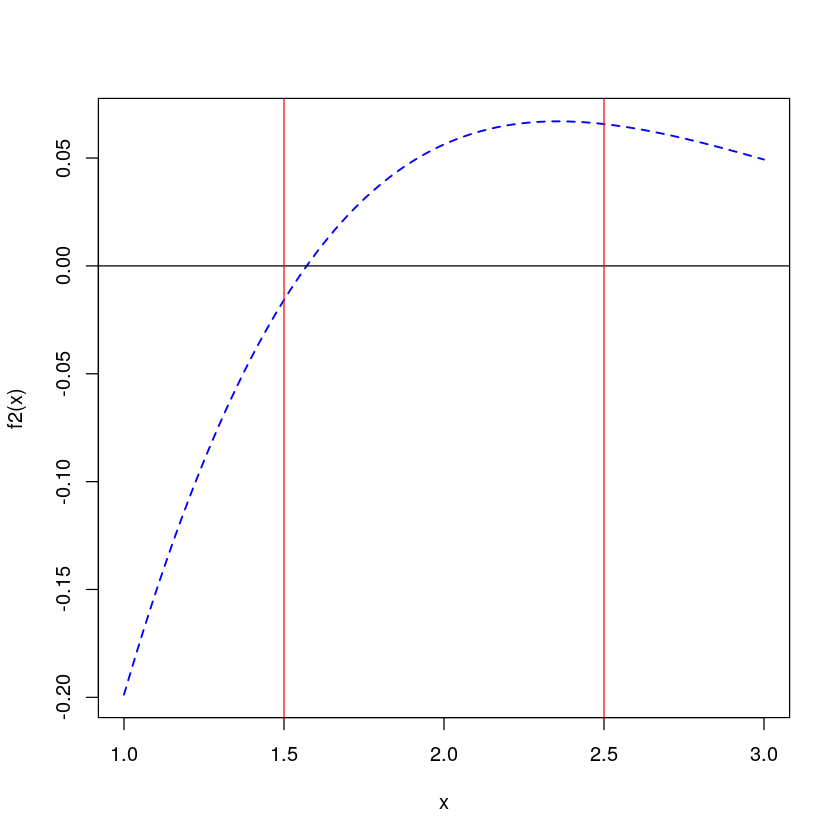

In [14]:
curve(f2, xlim=c(1,3), col='blue', lwd=1.5, lty=2)
abline(h=0)
abline(v=1.5, col='red')
abline(v=2.5, col='red')

In [4]:
goldensecsearch(f2, 1.5, 2.5, 0.01)

1.882 , 2.118

[1] 1.503107 1.505027

In [94]:
# para comparar
fibsearch(f2, 1.5, 2.5, 13)

[1] 1.502653 1.502653

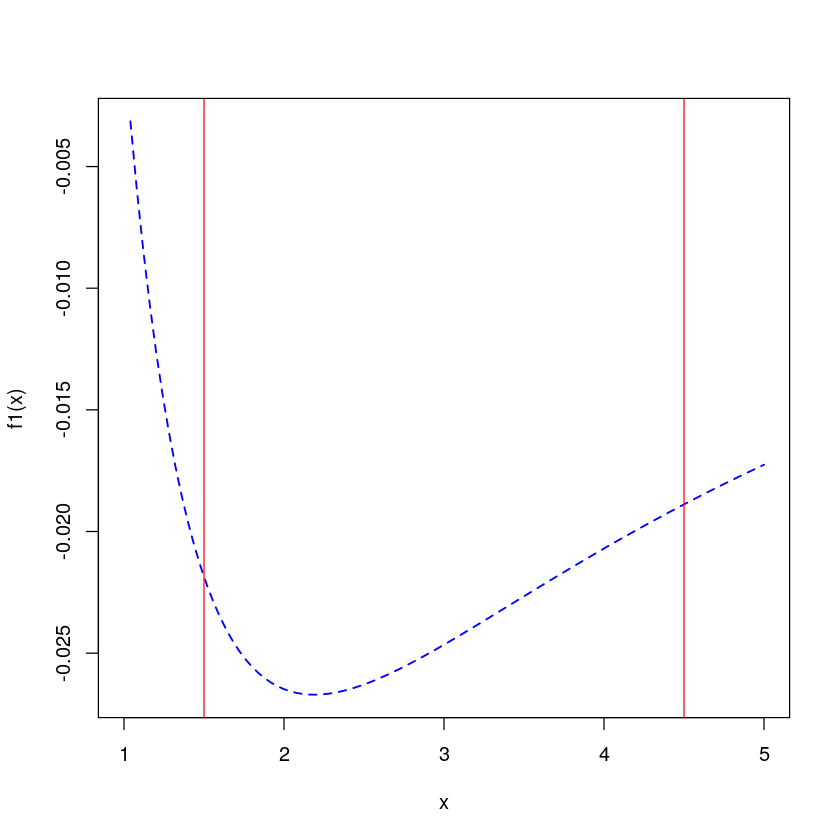

In [15]:
curve(f1, xlim=c(1,5), col='blue', lwd=1.5, lty=2)
abline(h=0)
abline(v=1.5, col='red')
abline(v=4.5, col='red')

In [102]:
fibsearch(f1, 1.5, 4.5, 12)

[1] 2.182403 2.182403

In [92]:
2*(2.5 - 1.5)/fib(11)

[1] 0.01388889

In [83]:
goldensecsearch(f2, 1.5, 2.5, 0.01)

[1] 1.503107 1.505027

In [96]:
optimize(f2, lower = 1.5, upper = 2.5)

$minimum
[1] 1.500066

$objective
[1] -0.01576785

In [97]:
optimize(f1, lower = 1.5, upper = 4.5)

$minimum
[1] 2.188708

$objective
[1] -0.02670719

In [83]:
goldensecsearch(f2, 1.5, 2.5, 0.01)

[1] 1.503107 1.505027

### Mismas funciones, pero ahora usando el método nativo de _R_:

In [96]:
optimize(f2, lower = 1.5, upper = 2.5)

$minimum
[1] 1.500066

$objective
[1] -0.01576785

In [97]:
optimize(f1, lower = 1.5, upper = 4.5)

$minimum
[1] 2.188708

$objective
[1] -0.02670719

## Aplicación

Se tienen los resultados de 10 lanzamientos de una moneda. Estos son:
```
    C S C S C C C C C C 
```

Si la verosimilitud de la secuencia de observaciones es $$l(\theta)=\theta(1-\theta)\theta(1-\theta)\theta^6=\theta^8(1-\theta)^2$$
donde $\theta$ es el parámetro de una distribución binomial.

* Obtenga el valor del parámetro que hace más plausible la observación obtenida

[1] 0.8000001 0.8000001

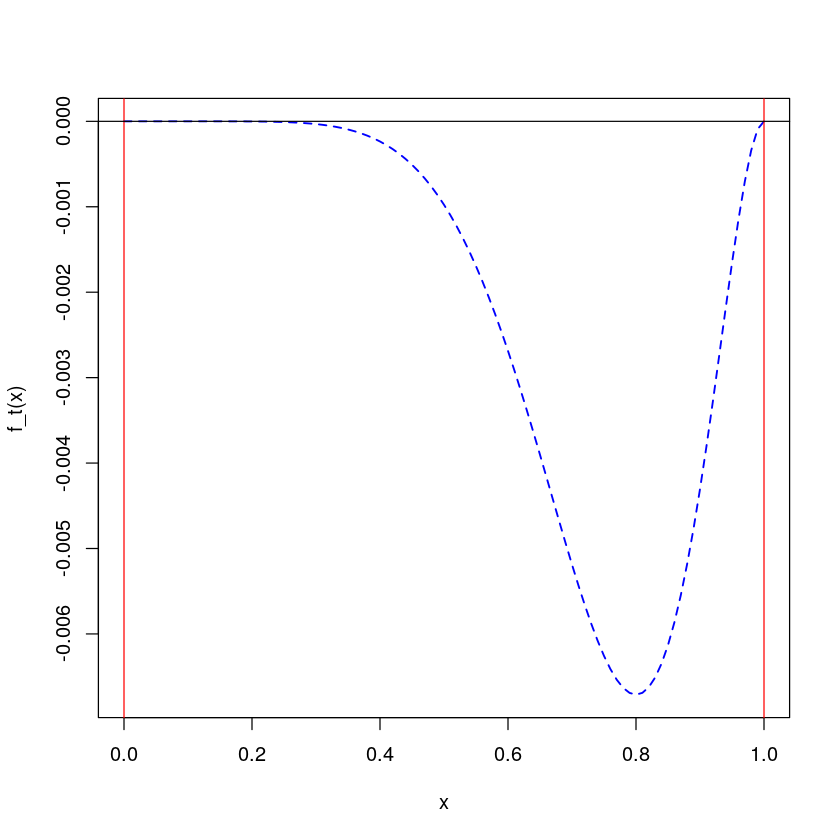

In [29]:
f_t <- function(theta){
    return(-1*(theta^8 * (1-theta)^2))
}

curve(f_t, xlim=c(0,1), col='blue', lwd=1.5, lty=2)
abline(v=0, col='red')
abline(v=1, col='red')
abline(h=0)

#goldensecsearch(f_t, 0.1, 0.9, 0.1, NMAX=10) # no funciona bien!
fibsearch(f_t, 0.05, 0.95, 30)
#optimize(f_t, lower = 0.1, upper = 0.9)

---
# Método de la Bisección

Este es un caso especial, dado que este método permite encontrar raíces de una función. El uso que se le da es para encontrar valores máximos.

El Método está basado en el teorema de Bolzano y consiste en partir de un intervalo $[x_0,x_1]$ tal que $f(x_0)f(x_1) < 0$, por lo que sabemos que existe, al menos, una raíz real. A partir de este punto se va reduciendo el intervalo sucesivamente hasta hacerlo tan pequeño como exija la precisión que hayamos decidido emplear. 

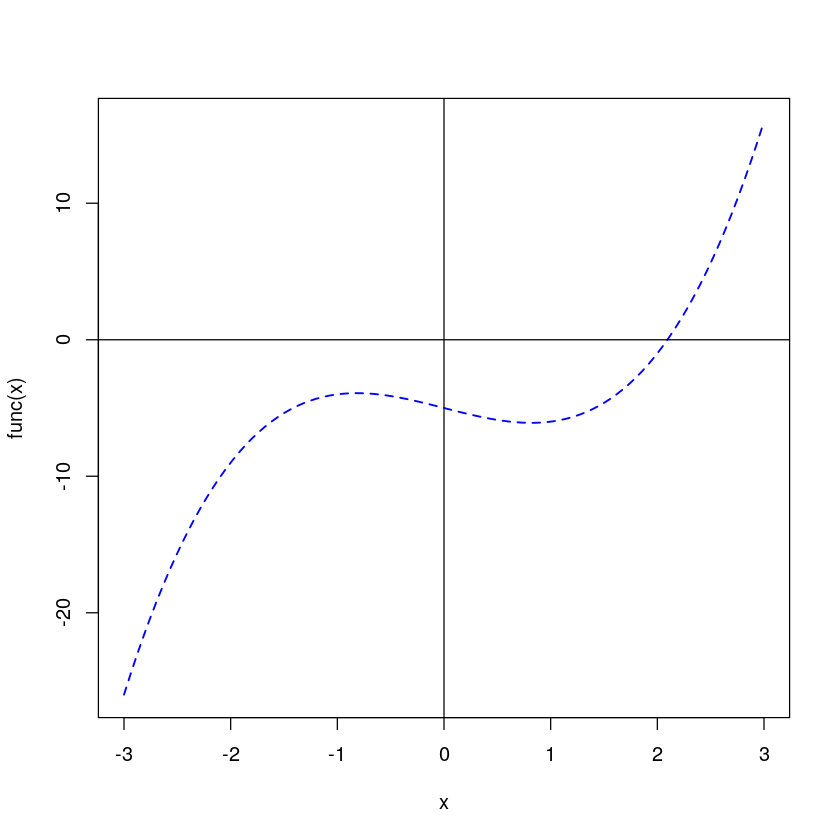

In [5]:
func <- function(x) {
  return(x^3 - 2 * x - 5)
}

curve(func, xlim=c(-3,3), col='blue', lwd=1.5, lty=2)
abline(h=0)
abline(v=0)

```
INPUT: Función f, valores extremos a, b, tolerancia TOL, cantidad máxima de iteraciones NMAX
CONDICIONES: a < b, o bien f(a) < 0 y f(b) > 0 o f(a) > 0 y f(b) < 0
OUTPUT: Valor que difiere de la raíz de f(x)=0 en un valor inferior a TOL
 
N ← 1
While N ≤ NMAX # limita la cantidad de iteraciones para evitar loops infinitos
  c ← (a + b)/2 # nuevo punto medio
  If f(c) = 0 or (b – a)/2 < TOL then # solución encontrada
    Output(c)
    Stop
  EndIf
  N ← N + 1 # incrementa el contador de pasos
  If sign(f(c)) = sign(f(a)) then a ← c else b ← c # nuevo intervalo
EndWhile
Output("El método no convergió.")
```

[1] 2.645691

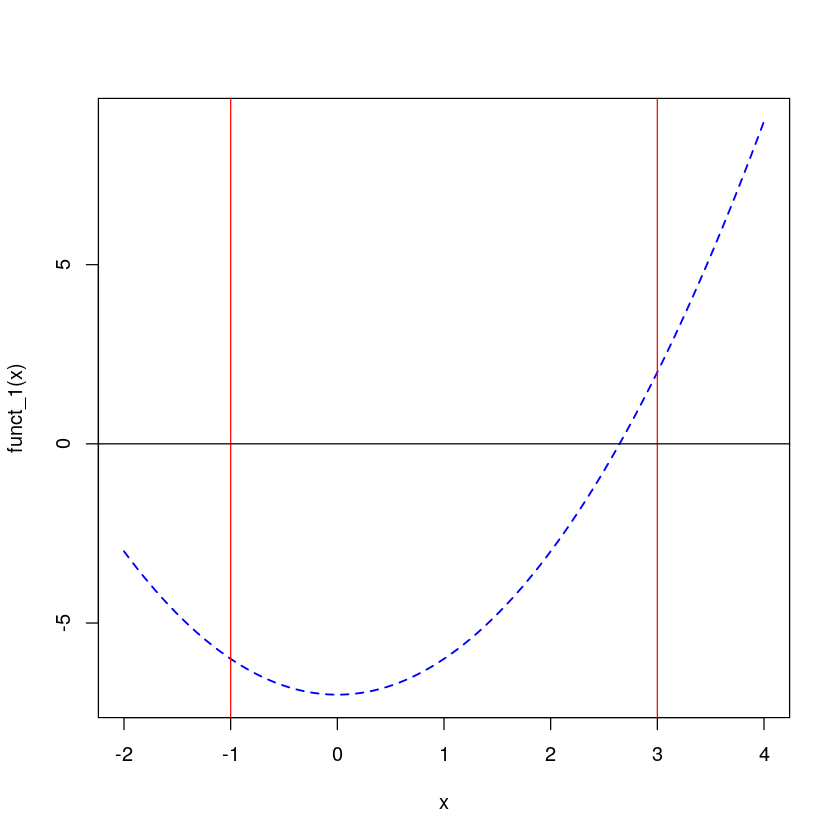

In [1]:
# f es la derivada de la función de la cual queremos encontrar su valor máximo
biseccion <- function(a, b, tol, f, NMAX=100){
    N <- 1
    while (N <= NMAX){
        c <- (a + b)/2.0

        if (f(c) == 0 || (b - a)/2.0 < tol){
            return(c)
        }
        N <- N + 1
        if(sign(f(c)) == sign(f(a)) ){
            a <- c
        }else{
            b <- c
        }
    }
    return(midpt)
}

funct_1 <- function(x){
  return(x^2 - 7)
}

curve(funct_1, xlim=c(-2,4), col='blue', lwd=1.5, lty=2)
abline(v=-1, col='red')
abline(v=3, col='red')
abline(h=0)

biseccion(a = -1, b = 3, tol = 0.0001, funct_1)

[1] 1
[1] 2.645749
[1] -1.275091e-05
[1] "finding root is successful"


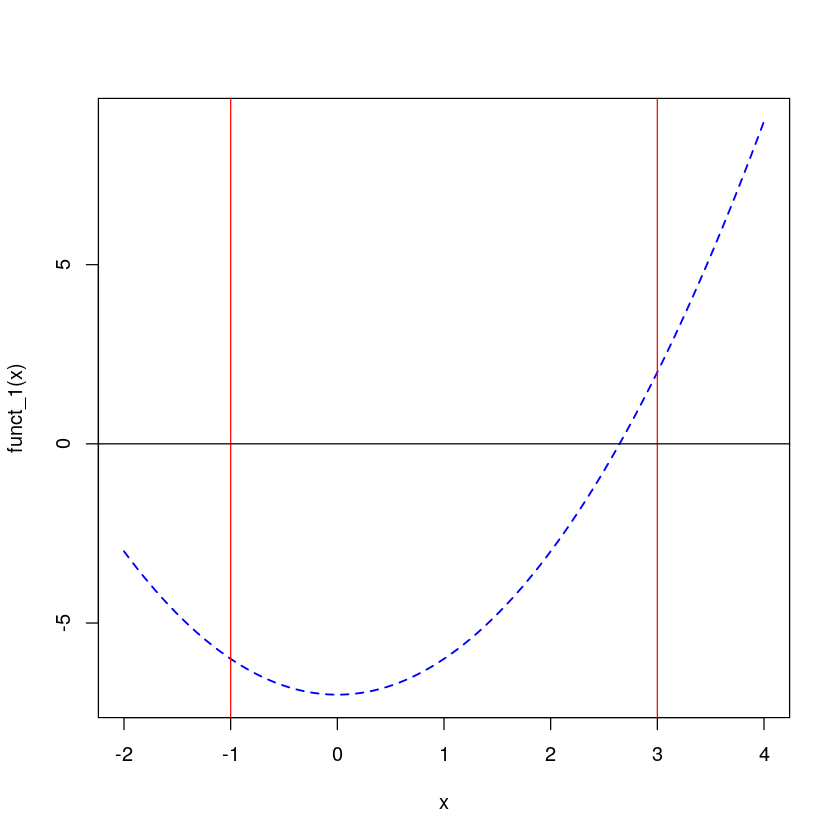

In [4]:
library(NLRoot)

funct_1 <- function(x){
  return(x^2 - 7)
}
curve(funct_1, xlim=c(-2,4), col='blue', lwd=1.5, lty=2)
abline(v=-1, col='red')
abline(v=3, col='red')
abline(h=0)

#biseccion(a = -1, b = 3, tol = 0.0001, funct_1)
BFfzero(funct_1, -1, 3)

En este caso se muestra en azul la función cuya raíz será encontrada y en verde la función que se está minimizando:

[1] 2.236023

[1] 1
[1] 2.236069
[1] 3.345544e-06
[1] "finding root is successful"


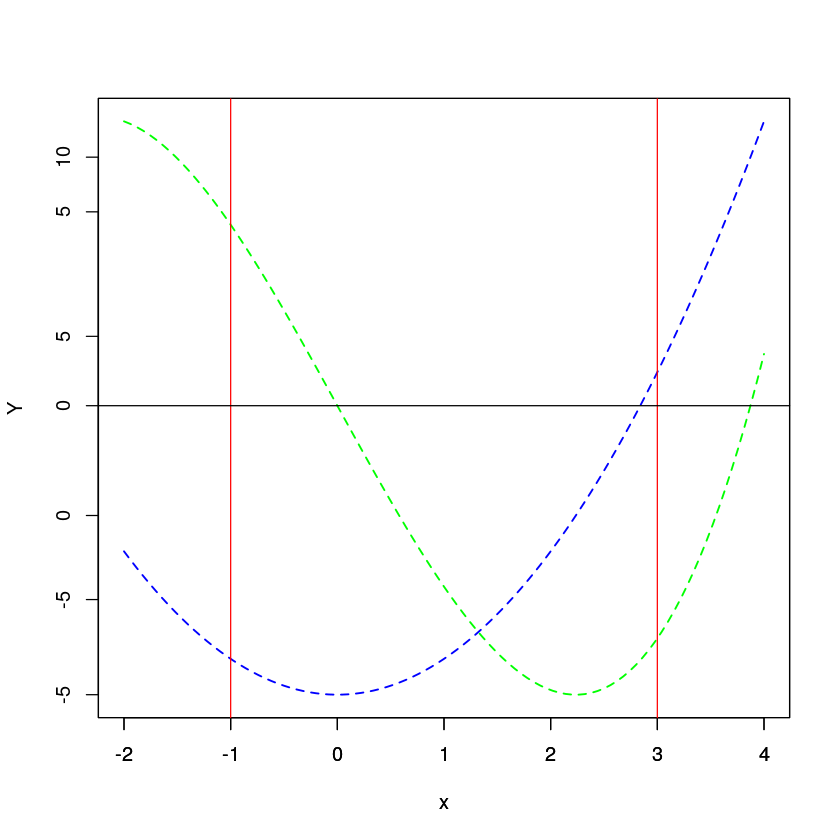

In [5]:
funct_2 <- function(x){
  return(x^2 - 5)
}

funct_2_ad <- function(x){
    return((1/3)*x^3 - 5*x)
}

curve(funct_2, xlim=c(-2,4), col='blue', lwd=1.5, lty=2, ylab = "Y")
par(new=TRUE)
curve(funct_2_ad, xlim=c(-2,4), col='green', lwd=1.5, lty=2, ylab = "")
abline(v=-1, col='red')
abline(v=3, col='red')
abline(h=0)

biseccion(a = -1, b = 3, tol = 0.0001, funct_2)
BFfzero(funct_2, -1, 3)

In [23]:
funct_3 <- function(x){
  return(exp(x) - 2)
}
biseccion(a = -1, b = 3, tol = 0.0001, funct_3)

[1] 2.645691

[1] 2.236023

[1] 0.6931763

Si consideramos el tamaño actual (en cierta iteración) del intervalo como el error del método en esa etapa, en la técnica de Bisección, el __error__ en el $n$-ésimo paso es proporcional al error en el $(n-1)$-ésimo paso. Esta es una característica de un método que _converge linealmente_ a la solución.

Cuando el error en el $n$-ésimo paso es proporcional al obtenido en el paso anterior ($n-1$) elevado al cuadrado, el método converge cuadráticamente y cuando este error es proporcional al producto del error alcanzado en los últimos dos pasos ($\propto (\mbox{error}_{n-1}\cdot\mbox{error}_{n-2})$) se dice que converge de manera _superlineal_.